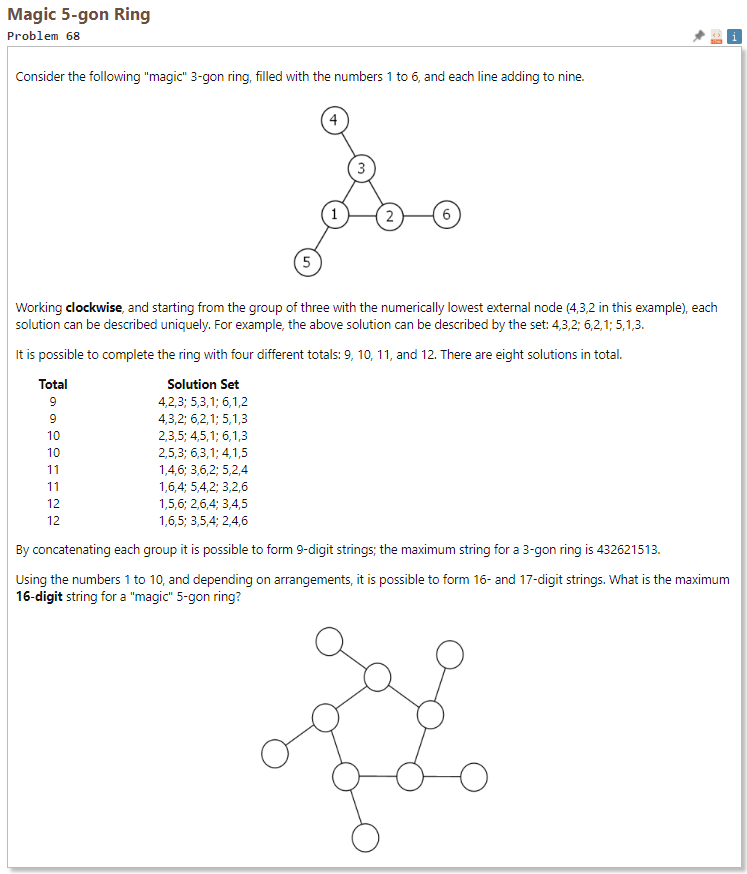

# Wrong Path (didnt realise each row has to sum to the same number)

Because it needs to be 16 digit we cant have 10 in the inner 5 as it would be used twice and result in a 17 digit string.  
I would think we want the digits with the biggest numbers going first, so my initial guess was:  
645:943:832:721:1015  
  
But this is wrong so lets try a computer approach

We letter the nodes going clockwise and then inwards:  
- Outer: A, B, C, D, E
- Inner: F, G, H, I, J  
  
Such that:  
- A -> G -> H
- B -> H -> I
- C -> I -> J
- D -> J -> F
- E -> F -> G

The numbers can be attached to any letter (except 10 which must go on the outside), but since it starts from the smallest number and then works clockwise, we will have to take this into account when concatenating them

lets generate all the possible permuations now

In [1]:
def permute(nums):
    "permute list of numbers provided iteratively"
    if len(nums) == 1:
        return nums
    elif len(nums) == 2:
        return [[nums[0], nums[1]], [nums[1], nums[0]]]
    elif len(nums) > 2:
        return [[n] + perm for i, n in enumerate(nums) for perm in permute(nums[:i] + nums[i+1:])]

In [2]:
# Letters (excluding 10)
numbers = [n for n in range(1, 10)]
permutations = permute(numbers)

# Available letters
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

all_positions = []

In [3]:
for l in ['A', 'B', 'C', 'D', 'E']:
    positions = {l:None for l in letters}
    
    # Assign 10 to one of the outer letters
    positions[l] = 10
    
    letters_left = [let for let in letters if let != l]
    
    for perm in permutations:
        for l, n in zip(letters_left, perm):
            positions[l] = n
        all_positions.append(positions)

In [4]:
def count_rows(rows):
    start = 0
    lowest = 1000
    for i, row in enumerate(rows):
        if row[0] < lowest:
            lowest = row[0]
            start = i
    order = rows[i:]+rows[:i]
    return int(''.join([str(d) for row in order for d in row]))

In [13]:
largest = 0
for pos in all_positions:
    rows = [
        [pos['A'], pos['G'], pos['H']],
        [pos['B'], pos['H'], pos['I']],
        [pos['C'], pos['I'], pos['J']],
        [pos['D'], pos['J'], pos['F']],
        [pos['E'], pos['F'], pos['G']],
       ]
    if len(set([sum(row) for row in rows])) > 1:
        continue
    new = count_rows(rows)
    if new > largest:
        largest = new

In [15]:
rows

[[9, 4, 3], [8, 3, 2], [7, 2, 1], [6, 1, 5], [10, 5, 4]]

In [16]:
set([sum(row) for row in rows])

{10, 12, 13, 16, 19}

In [106]:
len(str(largest))

16

The exact same as I thought before - but still wrong

# Parallel Equations

Wrong as I didnt realise 4 not 5 equations and I want something more automated

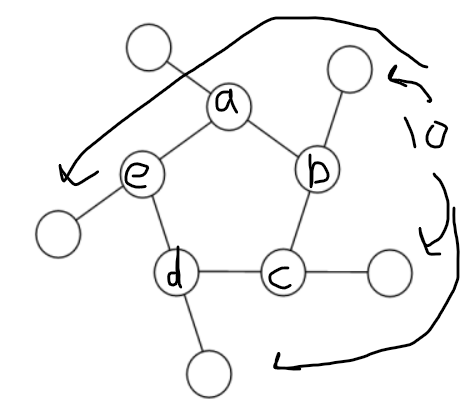

We know that above is true (given we start at the node pointing to a), but we can try to work our way from the top down and see if the largest possible outer ring would result in viable equations.  
For instance, if we have 10, 6, 9, 8, 7 on the outside this is the largest the sum could be (as it would have the largest digits starting the string).  
Giving these equations:
- 10 + a + e =
- 6 + b + c =
- 9 + c + d ..
  
giving 4 equations with 5 unknowns so not quite solvable - we can try to guess a number in the middle as well to make it solvable (from the remaining ones that give the largest sum)

In [25]:
def permute(nums):
    "permute list of numbers provided recursively"
    if len(nums) == 1:
        return nums
    elif len(nums) == 2:
        return [[nums[0], nums[1]], [nums[1], nums[0]]]
    elif len(nums) > 2:
        return [[n] + perm for i, n in enumerate(nums) for perm in permute(nums[:i] + nums[i+1:])]

In [46]:
def calculate_highest_to_smallest(nums: list) -> list:
    "Calculates the ordered highest to lowest lists of 4 possible numbers (10 included)"
    dummy = nums.copy()
    dummy.sort()
    change = dummy[1:][::-1] + [10]
    return [[dummy[0]] + perm for perm in permute(change)]

In [47]:
calculate_highest_to_smallest([6, 7, 8, 9])

[[6, 9, 8, 7, 10],
 [6, 9, 8, 10, 7],
 [6, 9, 7, 8, 10],
 [6, 9, 7, 10, 8],
 [6, 9, 10, 8, 7],
 [6, 9, 10, 7, 8],
 [6, 8, 9, 7, 10],
 [6, 8, 9, 10, 7],
 [6, 8, 7, 9, 10],
 [6, 8, 7, 10, 9],
 [6, 8, 10, 9, 7],
 [6, 8, 10, 7, 9],
 [6, 7, 9, 8, 10],
 [6, 7, 9, 10, 8],
 [6, 7, 8, 9, 10],
 [6, 7, 8, 10, 9],
 [6, 7, 10, 9, 8],
 [6, 7, 10, 8, 9],
 [6, 10, 9, 8, 7],
 [6, 10, 9, 7, 8],
 [6, 10, 8, 9, 7],
 [6, 10, 8, 7, 9],
 [6, 10, 7, 9, 8],
 [6, 10, 7, 8, 9]]

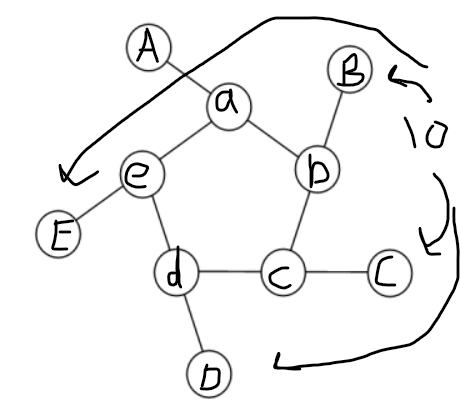

A + a + b = B + b + c = 

# Priority

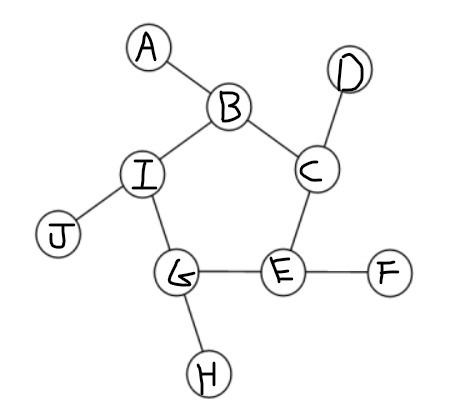

This is the order of priority (we want higher numbers at the earlier letters)  
We have restraints though so we cant just place them how we want, as well as 10 being a special case as its digits are low, so this is actually considered the worst number.  

### Brute forcish method

Lets make permutations in order of best to worst

In [121]:
best_ordering = [9, 8, 7, 6, 5, 4, 3, 2, 1, 10]
order = permute(best_ordering)

Gives us the ideal order to check what would give the highest string to the lowest string, now we have to amend this as a lot of these dont fall within our constraints

In [122]:
def validate_order(order):
    # The outside rings are at positions [0, 3, 5, 7, 9]
    # 10 must be on the outside
    order = [o for o in order if 10 in [o[0]] + o[3::2]]
    # smallest number must start on outside
    order = [
        [o[:3], [o[3], o[2], o[4]], [o[5], o[4], o[6]], [o[7], o[6], o[8]], [o[9], o[8], o[1]]]
        for o in order if min([o[0]] + o[3::2]) == o[0]]
    return order

In [123]:
valid = validate_order(order)

In [133]:
''.join([''.join([str(val) for val in g]) for g in [grouping for grouping in valid if len(set([sum(group) for group in grouping])) == 1][0]])

'6531031914842725'

### Faster Method

In [ ]:
def efficient_permute(nums)